In [2]:
import sys
import os
import numpy as np
from brainspace.mesh.mesh_io import read_surface
from brainspace.utils.parcellation import map_to_labels
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
from brainspace.plotting import plot_hemispheres
import nibabel as nb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap

In [20]:
lh_yeo_human_test = nb.load("../../../Atlas/alignment_macaque-human/cross-species_parcellation/L.Yeo2011_7Networks_N1000.human.32k_fs_LR.label.gii")
lh_yeo_human_test.labeltable.get_labels_as_dict()

{0: '???',
 1: 'N1_Visual',
 2: 'N2_Somatomotor',
 3: 'N3_DorsalAtt',
 4: 'N4_VentralAtt',
 5: 'N5_Limbic',
 6: 'N6_Frontoparietal',
 7: 'N7_Default'}

In [3]:
## Load in the Yeo for macaque and human
lh_human = read_surface("../../../Atlas/alignment_macaque-human/surfaces/Human/32k_fs_LR/S1200.L.inflated_MSMAll.32k_fs_LR.surf.gii")
rh_human = read_surface("../../../Atlas/alignment_macaque-human/surfaces/Human/32k_fs_LR/S1200.R.inflated_MSMAll.32k_fs_LR.surf.gii")
lh_macaque = read_surface("../../../Atlas/alignment_macaque-human/surfaces/Macaque/32k_fs_LR/MacaqueYerkes19.L.inflated.32k_fs_LR.surf.gii")
rh_macaque = read_surface("../../../Atlas/alignment_macaque-human/surfaces/Macaque/32k_fs_LR/MacaqueYerkes19.R.inflated.32k_fs_LR.surf.gii")

lh_yeo_human = nb.load("../../../Atlas/alignment_macaque-human/cross-species_parcellation/L.Yeo2011_7Networks_N1000.human.32k_fs_LR.label.gii").agg_data()
rh_yeo_human = nb.load("../../../Atlas/alignment_macaque-human/cross-species_parcellation/R.Yeo2011_7Networks_N1000.human.32k_fs_LR.label.gii").agg_data()
lh_yeo_macaque = nb.load("../../../Atlas/alignment_macaque-human/cross-species_parcellation/L.Yeo2011_7Networks_N1000.human-to-monkey.32k_fs_LR.label.gii").agg_data()
rh_yeo_macaque = nb.load("../../../Atlas/alignment_macaque-human/cross-species_parcellation/R.Yeo2011_7Networks_N1000.human-to-monkey.32k_fs_LR.label.gii").agg_data()
yeo_human = np.reshape(np.vstack((lh_yeo_human, rh_yeo_human)), (-1))
yeo_macaque = np.reshape(np.vstack((lh_yeo_macaque, rh_yeo_macaque)), (-1))

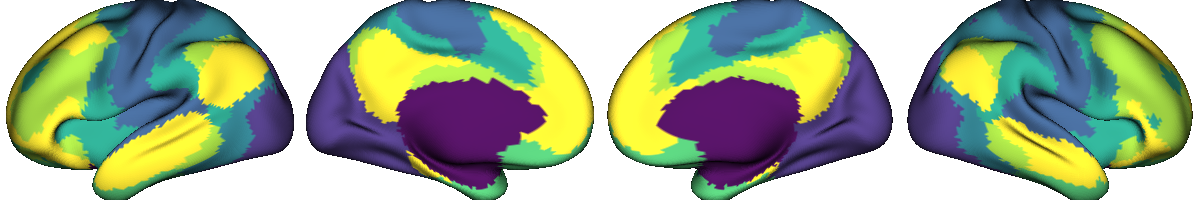

In [42]:
plot_hemispheres(
    lh_human, 
    rh_human, 
    array_name=yeo_human,
    embed_nb=True,
    size=(1200, 200),
    zoom=1.85,
    interactive=True
    )

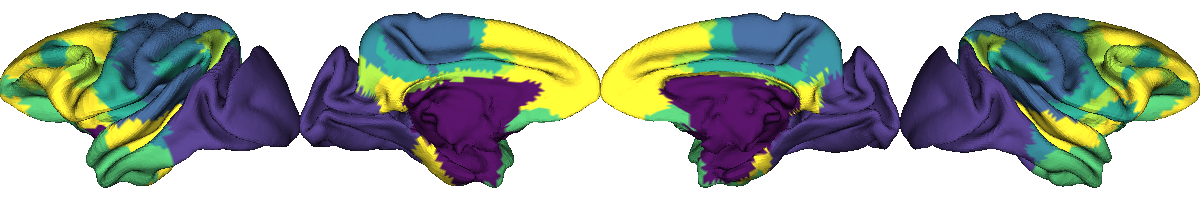

In [7]:
plot_hemispheres(
    lh_macaque, 
    rh_macaque, 
    array_name=yeo_macaque,
    embed_nb=True,
    size=(1200, 200),
    zoom=1.85,
    interactive=True
    )

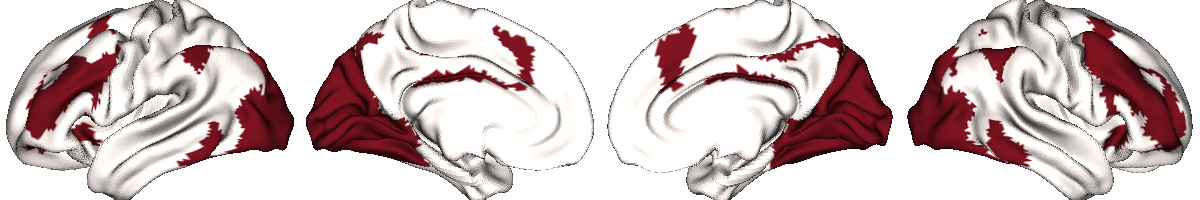

In [13]:
## Test function for filtering
yeo_human_edit = np.copy(yeo_human)
yeo_human_edit[yeo_human_edit == 6] = 1
yeo_human_edit[yeo_human_edit != 1] = 0
plot_hemispheres(
    lh_human, 
    rh_human, 
    array_name=yeo_human_edit,
    embed_nb=True,
    size=(1200, 200),
    zoom=1.85,
    interactive=True,
    cmap="Reds"
    )

In [11]:
yeo_human_edit

array([7, 2, 2, ..., 7, 7, 7], dtype=int32)

In [4]:
def saveImage(array, surf_lh, surf_rh, savePath):
    plot_hemispheres(
        surf_lh,
        surf_rh,
        array_name=array,
        size=(1200, 200),
        zoom=1.8,
        cmap="Reds",
        transparent_bg=True,
        screenshot=True,
        filename=savePath,
        layout_style="row",
        nan_color=(7, 7, 7, 1)
    )

def save_networks(yeo_human, yeo_macaque, lh_macaque, rh_macaque, lh_human, rh_human):
    network_order = ('Visual', 'Somatomotor', 'DorsalAtt', 'VentralAtt', 'Limbic', 'Frontoparietal', 'Default')
    baseSavePath = '../Figure6Images/NetworkSurfaces'
    for index, network in enumerate(network_order, start=1):
        yeo_human_copy = np.where(yeo_human == index, 1, 0)
        yeo_macaque_copy = np.where(yeo_macaque == index, 1, 0)

        humanSavePath = os.path.join(baseSavePath, 'Human' + network + '.png')
        macaqueSavePath = os.path.join(baseSavePath, 'Macaque' + network + '.png')
        saveImage(yeo_human_copy, lh_human, rh_human, humanSavePath)
        saveImage(yeo_macaque_copy, lh_macaque, rh_macaque, macaqueSavePath)

        

save_networks(yeo_human, yeo_macaque, lh_macaque, rh_macaque, lh_human, rh_human)